In [1]:
import os
import re
import exrex
import numpy
import json
import Bio.SeqIO
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [12]:
# Compute and save performance metrics for KEVOLVE
data = {}

# Iterate throught prediction files
for n in range(1, 101): 
    y_true = []
    y_pred = []
    df = pd.read_csv("KEVOLVE/" + str(n) + "/prediction.csv")

    # Get the true label and the prediction
    for i, row in df.iterrows():
        indexes = [i for i, c in enumerate(row["id"]) if c == "|"]
        y_true.append(row["id"][indexes[len(indexes)-1] +1 :])
        y_pred.append(row["y_pred"])

    # Compute the performance metrics
    f1 = f1_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')

    # Save the results in dictionary 
    data[str(n)] = {"precision":precision, "recall":recall, "f1_score":f1}

# Save the results in JSON format
with open("KEVOLVE.json", "w") as outfile:
    json.dump(data, outfile)

In [12]:
# Compute and save performance metrics for STREME
data = {}

# Iterate throught prediction files
for n in range(1, 101): 
    y_true = []
    y_pred = []
    df = pd.read_csv("STREME/" + str(n) + "/prediction.csv")

    # Get the true label and the prediction
    for i, row in df.iterrows():
        indexes = [i for i, c in enumerate(row["id"]) if c == "|"]
        y_true.append(row["id"][indexes[len(indexes)-1] +1 :])
        y_pred.append(row["y_pred"])

    # Compute the performance metrics
    f1 = f1_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')

    # Save the results in dictionary 
    data[str(n)] = {"precision":precision, "recall":recall, "f1_score":f1}

# Save the results in JSON format
with open("STREME.json", "w") as outfile:
    json.dump(data, outfile)

In [41]:
# Compute and save performance metrics for CASTOR_KRFE
data = {}

# Iterate throught prediction files
for n in range(1, 101): 
    y_true = []
    y_pred = []
    df = pd.read_csv("CASTOR_KRFE/" + str(n) + "/prediction.csv")

    # Get the true label and the prediction
    for i, row in df.iterrows():
        indexes = [i for i, c in enumerate(row["id"]) if c == "|"]
        y_true.append(row["id"][indexes[len(indexes)-1] +1 :])
        y_pred.append(row["y_pred"])

    # Compute the performance metrics
    f1 = f1_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')

    # Save the results in dictionary 
    data[str(n)] = {"precision":precision, "recall":recall, "f1_score":f1}

# Save the results in JSON format
with open("CASTOR_KRFE.json", "w") as outfile:
    json.dump(data, outfile)

In [2]:
# Compute and save performance metrics for MEME_OOPS
data = {}

# Iterate throught prediction files
for n in range(1, 101): 
    y_true = []
    y_pred = []
    df = pd.read_csv("MEME_OOPS/" + str(n) + "/prediction.csv")

    # Get the true label and the prediction
    for i, row in df.iterrows():
        indexes = [i for i, c in enumerate(row["id"]) if c == "|"]
        y_true.append(row["id"][indexes[len(indexes)-1] +1 :])
        y_pred.append(row["y_pred"])

    # Compute the performance metrics
    f1 = f1_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')

    # Save the results in dictionary 
    data[str(n)] = {"precision":precision, "recall":recall, "f1_score":f1}

# Save the results in JSON format
with open("MEME_OOPS.json", "w") as outfile:
    json.dump(data, outfile)

In [3]:
# Compute and save performance metrics for MEME_ZOOPS
data = {}

# Iterate throught prediction files
for n in range(1, 101): 
    y_true = []
    y_pred = []
    df = pd.read_csv("MEME_ZOOPS/" + str(n) + "/prediction.csv")

    # Get the true label and the prediction
    for i, row in df.iterrows():
        indexes = [i for i, c in enumerate(row["id"]) if c == "|"]
        y_true.append(row["id"][indexes[len(indexes)-1] +1 :])
        y_pred.append(row["y_pred"])

    # Compute the performance metrics
    f1 = f1_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')

    # Save the results in dictionary 
    data[str(n)] = {"precision":precision, "recall":recall, "f1_score":f1}

# Save the results in JSON format
with open("MEME_ZOOPS.json", "w") as outfile:
    json.dump(data, outfile)

In [2]:
with open('KEVOLVE.json') as d:
    KEVOLVE_DATA = json.load(d)
with open('STREME.json') as d:
    STREME_DATA = json.load(d)  
with open('CASTOR_KRFE.json') as d:
    CASTOR_KRFE_DATA = json.load(d)
with open('MEME_OOPS.json') as d:
    MEME_OOPS_DATA = json.load(d)
with open('MEME_ZOOPS.json') as d:
    MEME_ZOOPS_DATA = json.load(d)

In [4]:
kevolve_f1 = []
kevolve_recall = []
kevolve_precision = []

streme_f1 = []
streme_recall = []
streme_precision = []

castor_krfe_f1 = []
castor_krfe_recall = []
castor_krfe_precision = []

meme_oops_f1 = []
meme_oops_recall = []
meme_oops_precision = []

meme_zoops_f1 = []
meme_zoops_recall = []
meme_zoops_precision = []

for key, value in KEVOLVE_DATA.items():
   kevolve_f1.append(value["f1_score"])
   kevolve_recall.append(value["recall"])
   kevolve_precision.append(value["precision"])

for key, value in STREME_DATA.items():
   streme_f1.append(value["f1_score"])
   streme_recall.append(value["recall"])
   streme_precision.append(value["precision"])

for key, value in CASTOR_KRFE_DATA.items():
   castor_krfe_f1.append(value["f1_score"])
   castor_krfe_recall.append(value["recall"])
   castor_krfe_precision.append(value["precision"])

for key, value in MEME_OOPS_DATA.items():
   meme_oops_f1.append(value["f1_score"])
   meme_oops_recall.append(value["recall"])
   meme_oops_precision.append(value["precision"])

for key, value in MEME_ZOOPS_DATA.items():
   meme_zoops_f1.append(value["f1_score"])
   meme_zoops_recall.append(value["recall"])
   meme_zoops_precision.append(value["precision"])

In [4]:
def computeConfusionMatrix(tool, n):

    print("Compute confusion matrices for " + tool + "_" + str(n) + "...")

    y_true = []
    y_pred = []
    matrices = {}
    df = pd.read_csv(tool + "/" + str(n) + "/prediction.csv")

    for i, row in df.iterrows():
        indexes = [i for i, c in enumerate(row["id"]) if c == "|"]
        y_true.append(row["id"][indexes[len(indexes)-1] +1 :])
        y_pred.append(row["y_pred"])

    confusion_matrix_matrix_none = confusion_matrix(y_true, y_pred, normalize=None)
    confusion_matrix_matrix_true = confusion_matrix(y_true, y_pred, normalize="true")
    confusion_matrix_matrix_pred = confusion_matrix(y_true, y_pred, normalize="pred")
    confusion_matrix_matrix_all = confusion_matrix(y_true, y_pred, normalize="all")

    matrices["confusion_matrix_matrix_none"] = confusion_matrix_matrix_none.tolist()
    matrices["confusion_matrix_matrix_true"] = confusion_matrix_matrix_true.tolist()
    matrices["confusion_matrix_matrix_pred"] = confusion_matrix_matrix_pred.tolist()
    matrices["confusion_matrix_matrix_all"] = confusion_matrix_matrix_all.tolist()

    with open("Confusion_matrix/" + tool + "_" + str(n) + "_confusion_matrix_matrix_none.json", "w") as outfile: json.dump(matrices["confusion_matrix_matrix_none"], outfile)
    with open("Confusion_matrix/" + tool + "_" + str(n) + "_confusion_matrix_matrix_true.json", "w") as outfile: json.dump(matrices["confusion_matrix_matrix_true"], outfile)
    with open("Confusion_matrix/" + tool + "_" + str(n) + "_confusion_matrix_matrix_pred.json", "w") as outfile: json.dump(matrices["confusion_matrix_matrix_pred"], outfile)
    with open("Confusion_matrix/" + tool + "_" + str(n) + "_confusion_matrix_matrix_all.json", "w") as outfile: json.dump(matrices["confusion_matrix_matrix_all"], outfile)


In [6]:
tools = ["KEVOLVE", "STREME", "CASTOR_KRFE", "MEME_OOPS", "MEME_ZOOPS"]
for tool in tools: Parallel(n_jobs = -1)(delayed(computeConfusionMatrix)(tool, n) for n in range(1, 101))

In [5]:
KEVOLVE_M = []
KEVOLVE_M_mean = []
KEVOLVE_M_standard_deviation = []

for n in range(1, 101): 
    with open("Confusion_matrix/KEVOLVE_" + str(n) + "_confusion_matrix_matrix_pred.json") as data: KEVOLVE_M.append(numpy.asarray(json.load(data)))

for i in range(0, 100):
    data = []
    for j in range(0, 100):
        data.append(KEVOLVE_M[j].flatten()[i]) 
    KEVOLVE_M_mean.append(round(statistics.mean(data) * 100, 2))
    KEVOLVE_M_standard_deviation.append(round(statistics.stdev(data)*100, 2))
KEVOLVE_M_mean = numpy.asarray(KEVOLVE_M_mean).reshape(10,10)
KEVOLVE_M_standard_deviation = numpy.asarray(KEVOLVE_M_standard_deviation).reshape(10,10)

KEVOLVE_combined = [f"{i}\n± {j}" for i, j in zip(KEVOLVE_M_mean.flatten(), KEVOLVE_M_standard_deviation.flatten())]
KEVOLVE_combined = numpy.asarray(KEVOLVE_combined).reshape(10,10)

In [6]:
STREME_M = []
STREME_M_mean = []
STREME_M_standard_deviation = []

for n in range(1, 101): 
    with open("Confusion_matrix/STREME_" + str(n) + "_confusion_matrix_matrix_pred.json") as data: STREME_M.append(numpy.asarray(json.load(data)))

for i in range(0, 100):
    data = []
    for j in range(0, 100):
        data.append(STREME_M[j].flatten()[i]) 
    STREME_M_mean.append(round(statistics.mean(data) * 100, 2))
    STREME_M_standard_deviation.append(round(statistics.stdev(data)*100, 2))
STREME_M_mean = numpy.asarray(STREME_M_mean).reshape(10,10)
STREME_M_standard_deviation = numpy.asarray(STREME_M_standard_deviation).reshape(10,10)

STREME_combined = [f"{i}\n± {j}" for i, j in zip(STREME_M_mean.flatten(), STREME_M_standard_deviation.flatten())]
STREME_combined = numpy.asarray(STREME_combined).reshape(10,10)

In [7]:
CASTOR_KRFE_M = []
CASTOR_KRFE_M_mean = []
CASTOR_KRFE_M_standard_deviation = []

for n in range(1, 101): 
    with open("Confusion_matrix/CASTOR_KRFE_" + str(n) + "_confusion_matrix_matrix_pred.json") as data: CASTOR_KRFE_M.append(numpy.asarray(json.load(data)))

for i in range(0, 100):
    data = []
    for j in range(0, 100):
        data.append(CASTOR_KRFE_M[j].flatten()[i]) 
    CASTOR_KRFE_M_mean.append(round(statistics.mean(data) * 100, 2))
    CASTOR_KRFE_M_standard_deviation.append(round(statistics.stdev(data)*100, 2))
CASTOR_KRFE_M_mean = numpy.asarray(CASTOR_KRFE_M_mean).reshape(10,10)
CASTOR_KRFE_M_standard_deviation = numpy.asarray(CASTOR_KRFE_M_standard_deviation).reshape(10,10)

CASTOR_KRFE_combined = [f"{i}\n± {j}" for i, j in zip(CASTOR_KRFE_M_mean.flatten(), CASTOR_KRFE_M_standard_deviation.flatten())]
CASTOR_KRFE_combined = numpy.asarray(CASTOR_KRFE_combined).reshape(10,10)

In [8]:
MEME_OOPS_M = []
MEME_OOPS_M_mean = []
MEME_OOPS_M_standard_deviation = []

for n in range(1, 101): 
    with open("Confusion_matrix/MEME_OOPS_" + str(n) + "_confusion_matrix_matrix_pred.json") as data: MEME_OOPS_M.append(numpy.asarray(json.load(data)))

for i in range(0, 100):
    data = []
    for j in range(0, 100):
        data.append(MEME_OOPS_M[j].flatten()[i]) 
    MEME_OOPS_M_mean.append(round(statistics.mean(data) * 100, 2))
    MEME_OOPS_M_standard_deviation.append(round(statistics.stdev(data)*100, 2))
MEME_OOPS_M_mean = numpy.asarray(MEME_OOPS_M_mean).reshape(10,10)
MEME_OOPS_M_standard_deviation = numpy.asarray(MEME_OOPS_M_standard_deviation).reshape(10,10)

MEME_OOPS_combined = [f"{i}\n± {j}" for i, j in zip(MEME_OOPS_M_mean.flatten(), MEME_OOPS_M_standard_deviation.flatten())]
MEME_OOPS_combined = numpy.asarray(MEME_OOPS_combined).reshape(10,10)

In [9]:
MEME_ZOOPS_M = []
MEME_ZOOPS_M_mean = []
MEME_ZOOPS_M_standard_deviation = []

for n in range(1, 101): 
    with open("Confusion_matrix/MEME_ZOOPS_" + str(n) + "_confusion_matrix_matrix_pred.json") as data: MEME_ZOOPS_M.append(numpy.asarray(json.load(data)))

for i in range(0, 100):
    data = []
    for j in range(0, 100):
        data.append(MEME_ZOOPS_M[j].flatten()[i]) 
    MEME_ZOOPS_M_mean.append(round(statistics.mean(data) * 100, 2))
    MEME_ZOOPS_M_standard_deviation.append(round(statistics.stdev(data)*100, 2))
MEME_ZOOPS_M_mean = numpy.asarray(MEME_ZOOPS_M_mean).reshape(10,10)
MEME_ZOOPS_M_standard_deviation = numpy.asarray(MEME_ZOOPS_M_standard_deviation).reshape(10,10)

MEME_ZOOPS_combined = [f"{i}\n± {j}" for i, j in zip(MEME_ZOOPS_M_mean.flatten(), MEME_ZOOPS_M_standard_deviation.flatten())]
MEME_ZOOPS_combined = numpy.asarray(MEME_ZOOPS_combined).reshape(10,10)

In [10]:
# Function to convert degenerative k-mers into a list of k-mers 
def convert_degenerative_k_mers(k_mer):
	k_mers = []
	temp_k_mer = ""
	
	for n in range(len(k_mer)): 
		if k_mer[n] == "A": temp_k_mer = temp_k_mer + "[A]"
		if k_mer[n] == "C": temp_k_mer = temp_k_mer + "[C]"
		if k_mer[n] == "G": temp_k_mer = temp_k_mer + "[G]"
		if k_mer[n] == "T": temp_k_mer = temp_k_mer + "[T]"
		if k_mer[n] == "N": temp_k_mer = temp_k_mer + "[ACGT]"
		if k_mer[n] == "X": temp_k_mer = temp_k_mer + "[ACGT]"
		if k_mer[n] == "V": temp_k_mer = temp_k_mer + "[^ACG]"
		if k_mer[n] == "H": temp_k_mer = temp_k_mer + "[^ACT]"
		if k_mer[n] == "D": temp_k_mer = temp_k_mer + "[^AGT]"
		if k_mer[n] == "B": temp_k_mer = temp_k_mer + "[^CGT]"
		if k_mer[n] == "M": temp_k_mer = temp_k_mer + "[AC]"
		if k_mer[n] == "W": temp_k_mer = temp_k_mer + "[AT]"
		if k_mer[n] == "R": temp_k_mer = temp_k_mer + "[AG]"
		if k_mer[n] == "K": temp_k_mer = temp_k_mer + "[GT]"
		if k_mer[n] == "S": temp_k_mer = temp_k_mer + "[CG]"
		if k_mer[n] == "Y": temp_k_mer = temp_k_mer + "[CT]"

	for i in exrex.generate(temp_k_mer): 
		k_mers.append(i)
	return k_mers

In [13]:
print("Precision", round(statistics.mean(castor_krfe_precision), 2))
print("Recall", round(statistics.mean(castor_krfe_recall), 2))
print("Precision", round(statistics.mean(castor_krfe_f1), 2))

Precision 0.86
Recall 1.0
Precision 0.9


In [11]:
# Compute and save performance metrics for KEVOLVE
data = {}
# Iterate throught prediction files
N = []
for n in range(1, 101): 
    y_true = []
    y_pred = []
    k_mers = []
    for record in Bio.SeqIO.parse("CASTOR_KRFE/" + str(n) + "/" + str(n) + ".fasta", "fasta"): k_mers.append(record.seq)
  
    k_mers = set(k_mers)
    N.append(len(k_mers))

In [13]:
NK= {
    "KEVOLVE": [43, 50, 72, 61, 63, 54, 42, 61, 66, 64, 62, 48, 61, 44, 50, 58, 58, 49, 49, 61, 51, 55, 50, 56, 64, 55, 54, 52, 43, 59, 63, 63, 51, 67, 61, 46, 53, 58, 60, 45, 60, 51, 54, 57, 56, 50, 57, 54, 45, 64, 58, 47, 52, 67, 64, 49, 47, 54, 56, 38, 48, 54, 53, 61, 61, 48, 54, 47, 61, 51, 62, 60, 61, 51, 46, 52, 63, 45, 54, 47, 57, 49, 53, 62, 60, 59, 58, 48, 61, 46, 68, 70, 56, 67, 48, 63, 46, 54, 58, 55],
    "STREME": [102, 103, 109, 104, 114, 113, 109, 116, 111, 104, 114, 109, 99, 103, 101, 100, 111, 107, 114, 112, 107, 112, 116, 105, 117, 100, 101, 108, 103, 104, 103, 106, 113, 108, 104, 106, 119, 99, 105, 103, 108, 105, 105, 109, 108, 111, 102, 104, 107, 106, 108, 100, 105, 104, 106, 107, 108, 110, 100, 97, 108, 116, 112, 109, 105, 106, 113, 122, 103, 98, 101, 109, 104, 106, 108, 109, 108, 100, 101, 104, 109, 109, 111, 111, 116, 104, 109, 104, 101, 104, 102, 107, 114, 100, 108, 106, 98, 104, 105, 116],
    "CASTOR KRFE": [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
    "MEME OOPS": [77, 89, 89, 79, 82, 83, 99, 85, 88, 89, 83, 89, 87, 80, 88, 81, 89, 81, 79, 79, 85, 84, 81, 92, 85, 90, 87, 78, 87, 83, 85, 90, 85, 77, 90, 83, 75, 74, 79, 88, 83, 92, 86, 83, 76, 81, 84, 88, 85, 86, 84, 85, 79, 91, 100, 86, 81, 88, 83, 78, 88, 82, 83, 86, 83, 85, 74, 80, 82, 76, 80, 78, 81, 78, 87, 77, 86, 75, 79, 78, 81, 73, 81, 89, 80, 83, 84, 94, 78, 90, 88, 90, 94, 89, 88, 86, 87, 91, 83, 73],
    "MEME ZOOPS": [58, 65, 73, 53, 59, 68, 67, 59, 57, 66, 64, 58, 61, 64, 72, 63, 63, 65, 62, 56, 57, 64, 67, 52, 61, 56, 61, 55, 54, 59, 58, 64, 54, 63, 64, 65, 65, 42, 65, 72, 54, 68, 60, 64, 56, 53, 58, 65, 65, 60, 70, 63, 60, 67, 61, 67, 53, 57, 52, 62, 62, 62, 60, 67, 58, 68, 49, 64, 57, 55, 47, 63, 54, 56, 64, 53, 55, 54, 63, 52, 60, 46, 73, 58, 52, 54, 62, 62, 58, 59, 62, 54, 60, 57, 62, 59, 62, 63, 57, 57]
}
with open("NUMBER_K_MERS.json", "w") as outfile:
    json.dump(NK, outfile)

<ipython-input-14-46061c4e2aaf>:65: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Figure.jpeg", dpi=200, format=None, metadata=None, bbox_inches=None, pad_inches=0.1, facecolor='auto', edgecolor='auto', backend=None,)


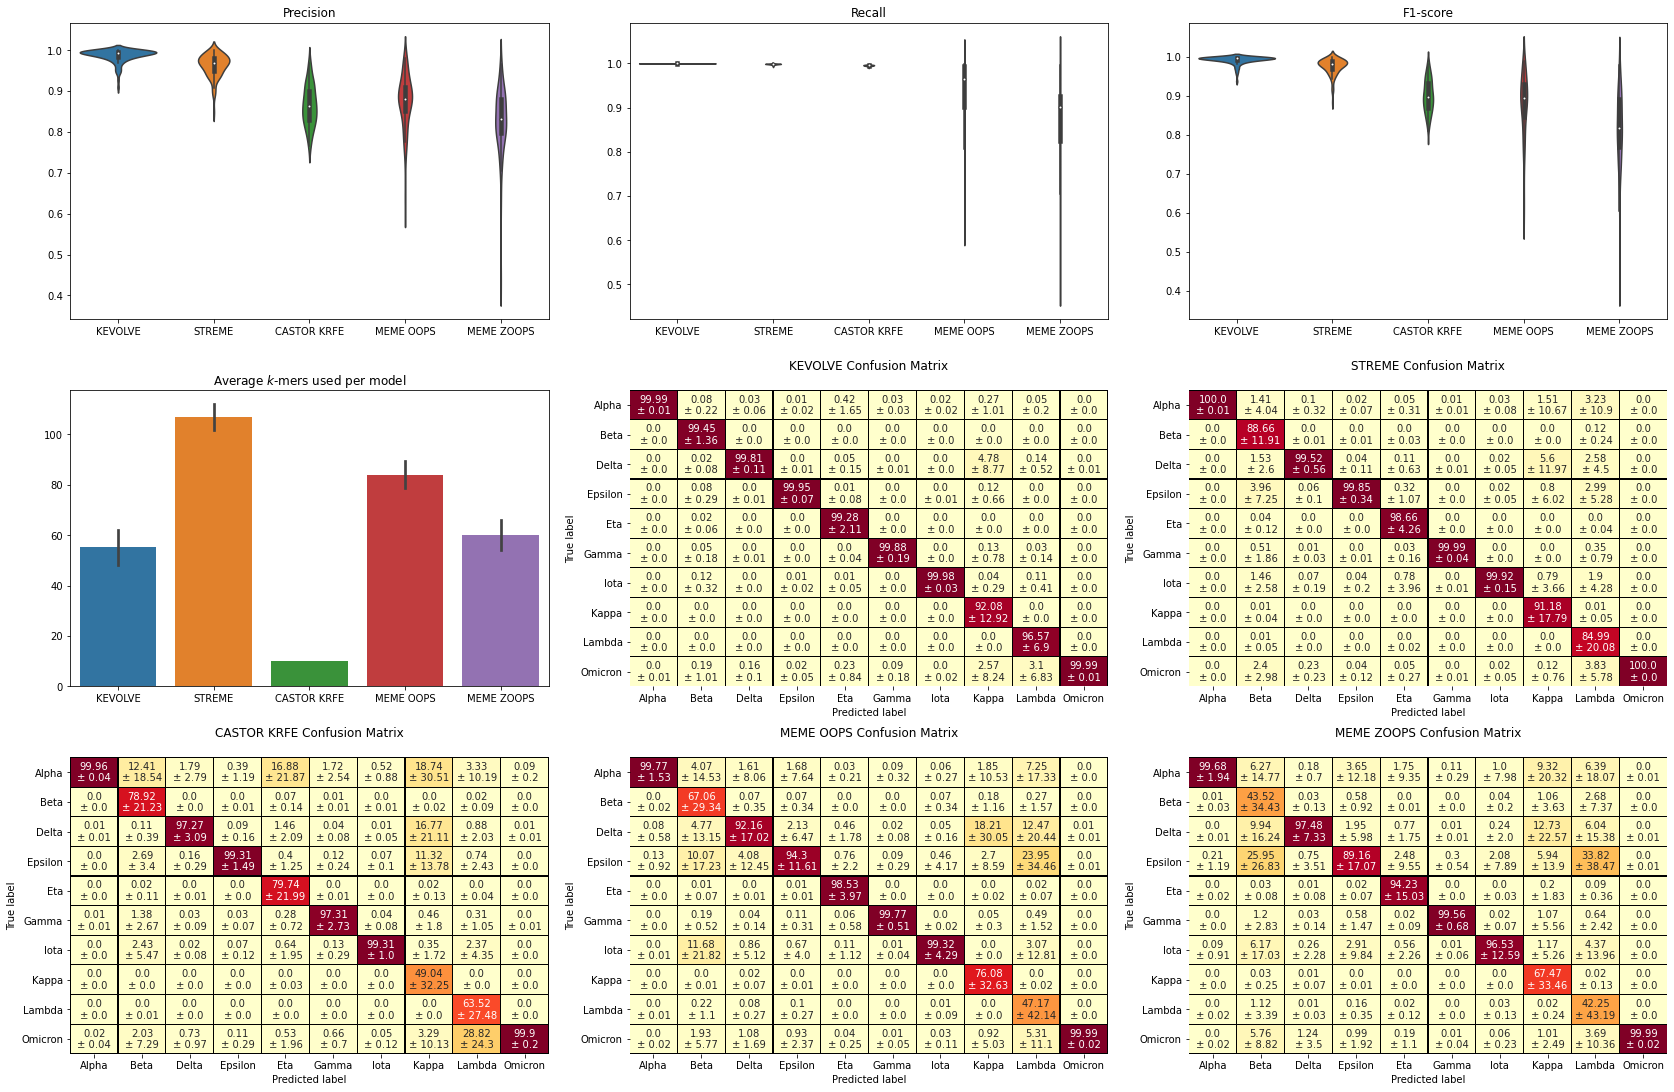

In [14]:

fig, axes = plt.subplots(3, 3, figsize=(24,16))
fig.tight_layout(pad=5.0)
with open('NUMBER_K_MERS.json') as d: N  = json.load(d)
df = pd.DataFrame.from_dict(N) 
classes = ["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"]

# Plots
sns.violinplot(ax=axes[0][0], data=[kevolve_precision, streme_precision, castor_krfe_precision, meme_oops_precision, meme_zoops_precision])
sns.violinplot(ax=axes[0][1], data=[kevolve_recall, streme_recall, castor_krfe_recall, meme_oops_recall, meme_zoops_recall])
sns.violinplot(ax=axes[0][2], data=[kevolve_f1, streme_f1, castor_krfe_f1, meme_oops_f1, meme_zoops_f1])

sns.barplot(ax=axes[1][0], data=df, ci="sd")
sns.heatmap(ax=axes[1][1], data=KEVOLVE_M_mean, annot=KEVOLVE_combined, fmt="", cmap='YlOrRd', linecolor="black", linewidths=.1, cbar=False)
sns.heatmap(ax=axes[1][2], data=STREME_M_mean, annot=STREME_combined, fmt="", cmap='YlOrRd', linecolor="black", linewidths=.1, cbar=False)

sns.heatmap(ax=axes[2][0], data=CASTOR_KRFE_M_mean, annot=CASTOR_KRFE_combined, fmt="", cmap='YlOrRd', linecolor="black", linewidths=.1, cbar=False)
sns.heatmap(ax=axes[2][1], data=MEME_OOPS_M_mean, annot=MEME_OOPS_combined, fmt="", cmap='YlOrRd', linecolor="black", linewidths=.1, cbar=False)
sns.heatmap(ax=axes[2][2], data=MEME_ZOOPS_M_mean, annot=MEME_ZOOPS_combined, fmt="", cmap='YlOrRd', linecolor="black", linewidths=.1, cbar=False)

# Titles
axes[0][0].set_title("Precision")
axes[0][1].set_title("Recall")
axes[0][2].set_title("F1-score")

axes[1][0].set_title("Average " + "$\mathit{k}$" + "-mers used per model")
axes[1][1].set_title("KEVOLVE Confusion Matrix\n")
axes[1][2].set_title("STREME Confusion Matrix\n")

axes[2][0].set_title("CASTOR KRFE Confusion Matrix\n")
axes[2][1].set_title("MEME OOPS Confusion Matrix\n")
axes[2][2].set_title("MEME ZOOPS Confusion Matrix\n")

# X ticks labels
axes[0][0].set_xticklabels(["KEVOLVE", "STREME", "CASTOR KRFE", "MEME OOPS", "MEME ZOOPS"])
axes[0][1].set_xticklabels(["KEVOLVE", "STREME", "CASTOR KRFE", "MEME OOPS", "MEME ZOOPS"])
axes[0][2].set_xticklabels(["KEVOLVE", "STREME", "CASTOR KRFE", "MEME OOPS", "MEME ZOOPS"])

axes[1][1].set_xticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"])
axes[1][2].set_xticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"])

axes[2][0].set_xticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"])
axes[2][1].set_xticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"])
axes[2][2].set_xticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"])

# X and Y Labels
axes[1][1].set_ylabel("True label")
axes[1][2].set_ylabel("True label")
axes[2][0].set_ylabel("True label")
axes[2][1].set_ylabel("True label")
axes[2][2].set_ylabel("True label")

axes[1][1].set_xlabel("Predicted label")
axes[1][2].set_xlabel("Predicted label")
axes[2][0].set_xlabel("Predicted label")
axes[2][1].set_xlabel("Predicted label")
axes[2][2].set_xlabel("Predicted label")

axes[1][1].yaxis.set_ticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"], rotation=0)
axes[1][2].yaxis.set_ticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"], rotation=0)
axes[2][0].yaxis.set_ticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"], rotation=0)
axes[2][1].yaxis.set_ticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"], rotation=0)
axes[2][2].yaxis.set_ticklabels(["Alpha", "Beta", "Delta", "Epsilon", "Eta", "Gamma", "Iota", "Kappa", "Lambda", "Omicron"], rotation=0)


plt.savefig("Figure.jpeg", dpi=200, format=None, metadata=None, bbox_inches=None, pad_inches=0.1, facecolor='auto', edgecolor='auto', backend=None,)
plt.show()